<a href="https://colab.research.google.com/github/MGHiremath028/Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Holiday pacakge predictaion
#1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the availab data of existing and potential customers to make the marketing expenditure more efficient.
#2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday purchase-prediction The data consists of 20 column and 4888 rows

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('/content/tour_package.csv')

In [60]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning
1.Handling Missing values

2.Handling Duplicates

3.Check datatype

4.Understand the dataset

In [61]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,45


In [62]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1817
Fe Male,155


In [63]:
df['MaritalStatus'].value_counts()

,count
MaritalStatus,
Married,2340
Divorced,950
Single,916
Unmarried,682


In [64]:
df['Occupation'].value_counts()

,count
Occupation,
Salaried,2368
Small Business,2084
Large Business,434
Free Lancer,2


In [65]:
df['Gender']= df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Widow','Widowed')

In [66]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [67]:
df['Gender'].value_counts()

,count
Gender,
Male,2916
Female,1972


In [68]:
# checking missing values
fetures_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in fetures_with_na:
  print(feature,np.round(df[feature].isnull().mean()*100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


Or of above

In [69]:
df.isnull().mean()*100

,0
CustomerID,0.000000
ProdTaken,0.000000
Age,4.623568
TypeofContact,0.511457
CityTier,0.000000
DurationOfPitch,5.135025
Occupation,0.000000
Gender,0.000000
NumberOfPersonVisiting,0.000000
NumberOfFollowups,0.920622


In [70]:
# Staticstics on the numerical value
df[fetures_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## impouting null value
1.impute Median value for Age column

2.impute Mode fro type of Contact

3.impute Median for Duration of pitch

4.impute Mode fro NumberFolloup as it Descreete featuers

5.impute Mode for prefferdPropertyStar

6.impute Median for the NumberTrips

7.Impute Mode for NumberOfChildrenVisiting

8.impute Mode for MonthlyIncome

In [71]:

df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [72]:
df.isnull().sum()

,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0


In [73]:
df.drop('CustomerID',inplace=True,axis=1)

# Feature Engineering


In [74]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [75]:
df['TotalVisits'] = df['NumberOfFollowups'] + df['NumberOfChildrenVisiting']

In [76]:
df.drop(columns=['NumberOfFollowups','NumberOfChildrenVisiting'],inplace=True)

In [77]:
# get all the numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print(numerical_features)

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisits']


In [78]:
# categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print(categorical_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [79]:
# discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
print(discrete_features)

['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisits']


# train test split and Model trainig


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [81]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisits
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,3,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,6.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,4.0
3,33.0,Company Invited,1,9.0,Salaried,Female,2,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,4.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,3.0


In [82]:
y.value_counts ()

,count
ProdTaken,
0,3968
1,920


In [83]:
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
# create column transform with 3 types if the transformers
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
     ('num_transformer',num_transformer,num_features),
     ('oh_transformer',oh_transformer,cat_features)
    ]
)


In [88]:
# create column transform with 3 types if the transformers
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
import pandas as pd # Import pandas

# Assuming X is your original DataFrame
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

num_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer(
    [
     ('num_transformer',num_transformer,num_features),
     ('oh_transformer',oh_transformer,cat_features)
    ]
)

# Assuming X_train and X_test are DataFrames from train_test_split
# Keep X_train and X_test as DataFrames:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train) # Use X_train DataFrame

# Transform X_test using the fitted preprocessor
X_test = preprocessor.transform(X_test)

# Convert the transformed data back to DataFrames if needed:
# Assuming you want to keep the original column names:
X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

### Apply Random forest classisfier training

In [94]:
# Import models from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Define the models dictionary
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

# Loop through models
for model_name, model in models.items():
    print(f"Training and evaluating model: {model_name}")
    print("=" * 50)

    # Train the model
    model.fit(X_train, y_train)

    # Predictions for train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training Set Metrics
    print("Training Set Performance")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')

    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print("-" * 30)

    # Test Set Metrics
    print("Test Set Performance")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_roc_auc = (
        roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
        if hasattr(model, "predict_proba") and len(set(y_test)) > 2
        else "N/A"
    )

    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC AUC: {test_roc_auc}")

    # Confusion Matrix and Classification Report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))
    print("=" * 50)
    print("\n")


Training and evaluating model: Decision Tree
Training Set Performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Test Set Performance
Accuracy: 0.9131
Precision: 0.9136
Recall: 0.9131
F1 Score: 0.9133
ROC AUC: N/A

Confusion Matrix:
[[743  44]
 [ 41 150]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       787
           1       0.77      0.79      0.78       191

    accuracy                           0.91       978
   macro avg       0.86      0.86      0.86       978
weighted avg       0.91      0.91      0.91       978



Training and evaluating model: Random Forest
Training Set Performance
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
------------------------------
Test Set Performance
Accuracy: 0.9223
Precision: 0.9246
Recall: 0.9223
F1 Score: 0.9160
ROC AUC: N/A

Confusion Matrix:
[[781   6]
 [ 70 121]]

Classification Report:
 

# Hyper parameter tuning


In [100]:
# Define rf_params before using it
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}  # Example parameters, adjust as needed

randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
]

In [101]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'n_estimators': [100, 200, 300],
   'max_depth': [None, 5, 10],
   'min_samples_split': [2, 5, 10]})]

In [103]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}  # Make sure model_params is defined
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=5, verbose=2, n_jobs=1, scoring='accuracy')
    random.fit(X_train, y_train)

    # Use model_params instead of model_param
    model_params[name] = random.best_params_

for model_name in model_params:
    print(f"-------------Best Params for {model_name}----------")
    print(model_params[model_name])
    print("=" * 50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   4.9s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   1.4s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   2.6s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   1.8s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   3.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   3.0s
[CV] END max_depth=None, min_sa

In [110]:
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix

# Predictions
y_train_pred = tuned_rf_model.predict(X_train)
y_test_pred = tuned_rf_model.predict(X_test)

# Training Set Performance
print("Training Performance:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Recall (weighted):", recall_score(y_train, y_train_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

# Test Set Performance
print("Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Recall (weighted):", recall_score(y_test, y_test_pred, average='weighted'))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Performance:
Accuracy: 1.0
Recall (weighted): 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3181
           1       1.00      1.00      1.00       729

    accuracy                           1.00      3910
   macro avg       1.00      1.00      1.00      3910
weighted avg       1.00      1.00      1.00      3910

Test Performance:
Accuracy: 0.9192229038854806
Recall (weighted): 0.9192229038854806
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       787
           1       0.97      0.61      0.75       191

    accuracy                           0.92       978
   macro avg       0.94      0.80      0.85       978
weighted avg       0.92      0.92      0.91       978

Confusion Matrix:
 [[783   4]
 [ 75 116]]


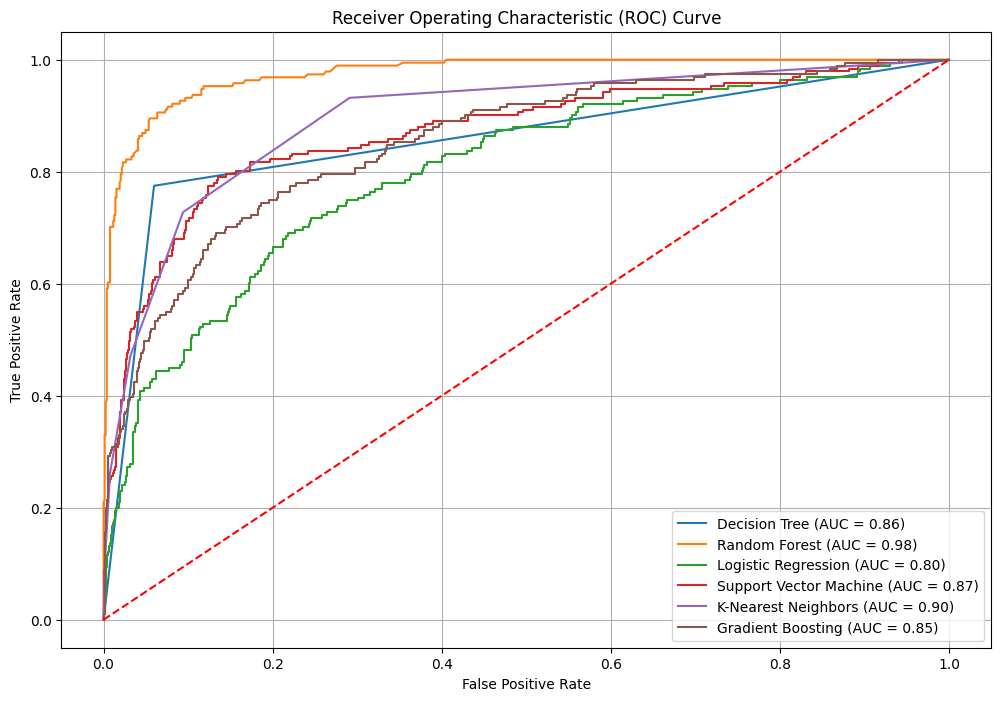

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features=7, max_depth=None),
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through all models and compute ROC curves
for label, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict probabilities for ROC (ensure the model supports `predict_proba`)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    else:  # For models like SVM with no `predict_proba`, use decision function
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize scores

    # Compute ROC metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], 'r--')

# Custom settings for the plot
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
